In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy.stats as stats
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the File

### The below Data is scraped from the cricinfo and cleaned separately and dumped in this notebook

In [2]:
match_data = pd.read_csv('Match Data.csv',index_col=0)

In [3]:
match_data.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


# Label Encoding

<dl>
  <dt>TEAM1_MODEL and TEAM2_MODEL</dt>
      <dd>- Team 1 = 1</dd>
      <dd>- Team 2 = 0</dd>
  <dt>TOSS_WINNER_MODEL</dt>
      <dd>- Team 1 Toss Win = 1</dd>
      <dd>- Team 2 Toss Win = 0</dd>
  <dt>WINNER_MODEL</dt>
      <dd>- Team 1 Winner = 1</dd>
      <dd>- Team 2 Winner = 0</dd>
  <dt>CITY_MODEL</dt>
      <dd>- Team 1 Venue = 1</dd>
      <dd>- Team 2 Venue = 0</dd>
      <dd>- Outside Venue = 2</dd>
  <dt>TOSS_DECISION_MODEL</dt>
      <dd>- Field = 1</dd>
      <dd>- Bat = 0 </dd>
</dl>

## Analysis of the Data

### Chi Square Results of Categorical Data

In [4]:
def plot_graph(ct):
    ct.plot.bar(stacked=True)
    plt.legend(title='mark')

    plt.show()

In [5]:
toss_winner = pd.crosstab(match_data['TOSS_WINNER_MODEL'],match_data['WINNER_MODEL'])
toss_winner


WINNER_MODEL,0,1
TOSS_WINNER_MODEL,,
0,227,212
1,146,162


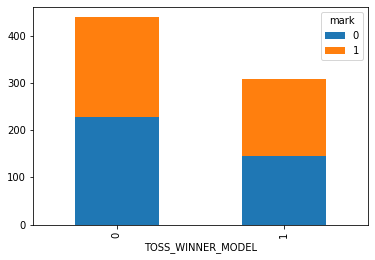

In [6]:
plot_graph(toss_winner)

- Explanation: If Team1(1) wins the toss then Team2(0) wins 146 times while Team1(1) wins 162 times

In [7]:
city_winner = pd.crosstab(match_data['CITY_MODEL'],match_data['WINNER_MODEL'])
city_winner


WINNER_MODEL,0,1
CITY_MODEL,,
0,136,108
1,135,174
2,102,92


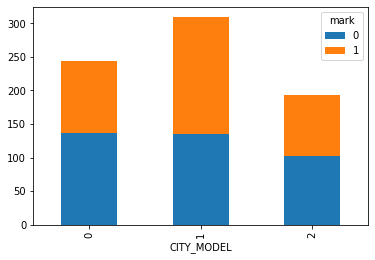

In [8]:
plot_graph(city_winner)

- Explanation: If City_Model = 0 ( Match is played in homeground of Team2) then Team2 wins 136 times and Team1 wins 108 times

In [9]:
descion_winner = pd.crosstab(match_data['TOSS_DECISION_MODEL'],match_data['WINNER_MODEL'])
descion_winner

WINNER_MODEL,0,1
TOSS_DECISION_MODEL,,
0,227,231
1,146,143


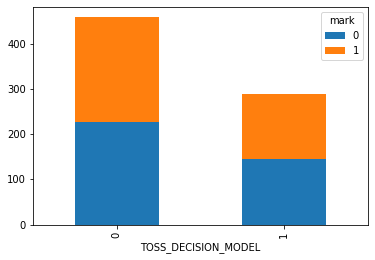

In [10]:
plot_graph(descion_winner)

- Explanation: If TOSS_DECISION_MODEL = 0(Irrespective of who won the toss if winner decision is bat) then Team1 wins 231 times
and Team2 wins 227 times

### Winners Overall

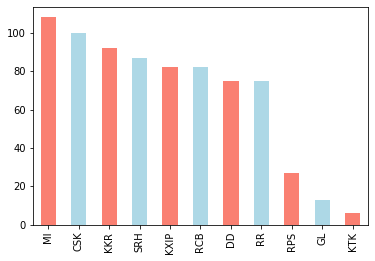

In [11]:
match_data["WINNER"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Calculating Win Rate 

- Win Rata for a particular match of a team is calculated solely based on it's past performance.
- Untill a team wins a match the win rate will remain 0
- Eg 2015 MI vs CSK, we will take into account the data from 2008 till 2015 before that match

In [12]:
def update_win_rate(dataframe):
    
    #creating two new columns and setting them to 0 by default
    null_values = []
    for i in range(len(dataframe)):
        null_values.append(0)
    dataframe['TEAM1_WIN_RATE'] = null_values
    dataframe['TEAM2_WIN_RATE'] = null_values


    #initialising the number of matches played by each team to 0
    total_match_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}

    total_matches = 0;
    #initializing the number of matches won by each team to zero
    match_wins_team_wise = {'KKR':0,'CSK':0,'RCB':0,'KXIP':0,'DD':0,'SRH':0,'RPS':0,'GL':0,'KTK':0,'RR':0,'MI':0}
    
    years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    
    for k in range(len(dataframe)):
        #we want win_rate of a team before a match so this condition is used
        #so we start calculating winrate only after each team has won a match
        if match_wins_team_wise[dataframe.loc[k,'TEAM1']] > 0: 
            dataframe.loc[k,'TEAM1_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM1']]/total_match_team_wise[dataframe.loc[k,'TEAM1']]
        
        if match_wins_team_wise[dataframe.loc[k,'TEAM2']] >0:#same as before
            dataframe.loc[k,'TEAM2_WIN_RATE'] = match_wins_team_wise[dataframe.loc[k,'TEAM2']]/total_match_team_wise[dataframe.loc[k,'TEAM2']]
        
        #increamenting the match wins,total matches of teams 
        match_wins_team_wise[dataframe.loc[k,'WINNER']] +=1
        total_match_team_wise[dataframe.loc[k,'TEAM1']]+=1;
        total_match_team_wise[dataframe.loc[k,'TEAM2']]+=1;
        
    return dataframe 


In [13]:
match_data_with_win_rate = update_win_rate(match_data)

In [14]:
match_data_with_win_rate.head()

,ID,SEASON,CITY,CITY_Corrrected,TEAM1,TEAM1_MODEL,TEAM2,TEAM2_MODEL,TOSS_WINNER,TOSS_DECISION,RESULT,WINNER,WIN_BY_RUNS,TOSS_WINNER_MODEL,WINNER_MODEL,TOSS_DECISION_MODEL,CITY_MODEL,TEAM1_WIN_RATE,TEAM2_WIN_RATE
0,60,2008,Bangalore,RCB,KKR,1,RCB,0,RCB,field,normal,KKR,140,0,1,0,0,0.0,0.0
1,61,2008,Chandigarh,KXIP,CSK,1,KXIP,0,CSK,bat,normal,CSK,33,1,1,1,0,0.0,0.0
2,62,2008,Delhi,DD,DD,1,RR,0,RR,bat,normal,DD,0,0,1,1,1,0.0,0.0
3,63,2008,Mumbai,MI,RCB,1,MI,0,MI,bat,normal,RCB,0,0,1,1,0,0.0,0.0
4,64,2008,Kolkata,KKR,KKR,1,SRH,0,SRH,bat,normal,KKR,0,0,1,1,1,1.0,0.0


# Reading all files

- Reading all the stats of a player to calculate the team strength
- onverting the datatypes for computation

In [15]:
def convert_datatype(dataset):
    #Setting dtypes

    dataset["Batting Innings"] = dataset["Batting Innings"].astype(int)
    dataset["Not out"] = dataset["Not out"].astype(int)
    dataset["Runs"] = dataset["Runs"].astype(int)
    dataset["High Score"] = dataset["High Score"].astype(int)
    dataset["Batting Average"] = dataset["Batting Average"].astype(float)
    dataset["Balls Faced"] = dataset["Balls Faced"].astype(int)
    dataset["Batting SR"] = dataset["Batting SR"].astype(float)
    dataset["100's"] = dataset["100's"].astype(int)
    dataset["50's"] = dataset["50's"].astype(int)
    dataset["0's"] = dataset["0's"].astype(int)
    dataset["4s"] = dataset["4s"].astype(int)
    dataset["6s"] = dataset["6s"].astype(int)
    dataset["Bowling Innings"] = dataset["Bowling Innings"].astype(int)
    dataset["Overs"] = dataset["Overs"].astype(float)
    dataset["Maidens"] = dataset["Maidens"].astype(int)
    dataset["Bowling Runs"] = dataset["Bowling Runs"].astype(int)
    dataset["Wickets"] = dataset["Wickets"].astype(int)
    dataset["Bowling Average"] = dataset["Bowling Average"].astype(float)
    dataset["Bowling Economy"] = dataset["Bowling Economy"].astype(float)
    dataset["Bowling SR"] = dataset["Bowling SR"].astype(float)
    dataset["4W Haul"] = dataset["4W Haul"].astype(int)
    dataset["5W Haul"] = dataset["5W Haul"].astype(int)
    dataset["Year"] = dataset["Year"].astype(int)
    
    return dataset

In [16]:
def read_player_data():
    path = r'C:\Users\khand\Desktop\IPL Predictions\data_version5'
    all_files = glob.glob(path + "/*.csv")
    columns=['Player', 'Matches', 'Batting Innings', 'Not out', 'Runs', 'High Score',
       'Batting Average', 'Balls Faced', 'Batting SR', "100's", "50's", "0's",
       '4s', '6s', 'Bowling Innings', 'Overs', 'Maidens', 'Bowling Runs',
       'Wickets', 'BBI', 'Bowling Average', 'Bowling Economy', 'Bowling SR',
       '4W Haul', '5W Haul', 'Catches', 'Stumpings']
    path
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.columns = columns
        df['High Score'] = df['High Score'].astype('str').str.strip('*')
        df["Year"] = filename[-8: -4]                                      #Extracting Year from filename 
        df["Team"] = filename[-13: -9].strip(path[-1]+'\\').upper()        #Extracting Team Name from filename 
        df = df.replace('-','0')
        li.append(df)

    all_years_player_performance = pd.concat(li, axis=0, ignore_index=True)
    all_years_player_performance.drop("BBI", axis=1, inplace=True) #BBI information is not needed
    all_years_player_performance = convert_datatype(all_years_player_performance)
    return all_years_player_performance
    

In [17]:
all_years_player_performance = read_player_data()

In [18]:
all_years_player_performance.T

,0,1,2,3,4,5,6,7,8,9,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Player,MEK Hussey,M Ntini,ML Hayden,M Muralitharan,MS Dhoni,MS Gony,SK Raina,JA Morkel,L Balaji,S Badrinath,...,V Shankar,Sandeep Sharma,WP Saha,Shakib Al Hasan,S Kaul,DJ Hooda,Basil Thampi,S Nadeem,RK Bhui,Abhishek Sharma
Matches,4,9,4,15,16,16,16,13,9,16,...,15,11,5,3,7,11,3,3,1,3
Batting Innings,3,2,4,1,14,5,14,10,1,11,...,14,2,5,1,2,7,1,0,1,3
Not out,1,1,1,0,4,4,3,3,0,5,...,2,2,0,0,1,1,1,0,0,1
Runs,168,11,189,0,414,35,421,241,0,192,...,244,6,86,9,0,64,1,0,7,9
High Score,116,11,81,0,65,15,55,71,0,64,...,40,5,28,9,0,20,1,0,7,5
Batting Average,84,11,63,0,41.4,35,38.27,34.42,0,32,...,20.33,0,17.2,9,0,10.66,0,0,7,4.5
Balls Faced,100,18,131,3,310,23,295,163,4,130,...,193,3,53,10,1,63,1,0,12,9
Batting SR,168,61.11,144.27,0,133.54,152.17,142.71,147.85,0,147.69,...,126.42,200,162.26,90,0,101.58,100,0,58.33,100
100's,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Calculate Player Strength (DREAM11 Formula)

### Concept of Calculating Strength 
    
- Initially we are calculating the strength of an individual player based on DREAM11 formula
- https://get.dream11.help/hc/en-us/articles/360021110932-Fantasy-Cricket-Points-System
- Aggregating the individual strength to calculate the overall team strength of the team.
- Feeding the strength of a team for a season to it's next season
- Eg. strength of MI for season 2010 will be fed to the 2011 season, for the prediction purpose. As while predicting the results of IPL2020 we will not have the strength of IPL2020 player performances. We will predict the results of 2020 based on 2019 IPL performance.

| Team1 | Team2 | Season | Strength1 | Strength2 | Win | Description |
| --- | --- | --- | --- | ---| ---| ---|
| MI | CSK | 2015 | 100 | 110 | MI |(Strength1 and Strength2 is actual strength of 2014) |

- Calculating the strength of a team based on the DREAM11 formula
- https://get.dream11.help/hc/en-us/articles/360021110932-Fantasy-Cricket-Points-System

In [19]:
def player_strength(df):
    """Calculates Player Batting, Bowling and Overall Strength with Dream 11 Formula per inning played
    """
    df['Batting Strength'] = (df['Batting Innings'] != 0).astype(int)*\
    ((df['Runs']+df['4s']+2*df['6s']+8*df["50's"]+16*df["100's"]-2*df["0's"])//df['Batting Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR']))

    df['Bowling Strength'] = (df['Bowling Innings'] != 0).astype(int)*\
    ((25*df['Wickets']+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul'])/df['Bowling Innings']\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy']))
   
    df['Strength'] = (df['Runs']+25*df['Wickets']+8*df['Catches']+12*df['Stumpings']+df['4s']+2*df['6s']\
    +8*df["50's"]+16*df["100's"]+8*df['Maidens']+8*df['4W Haul']+16*df['5W Haul']-2*df["0's"]\
    +(lambda a: (a>=11)*-6 +((a>=10) & (a<11))*-4 + ((a>=9) & (a<10))*-2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=4)*6 +((a>4) & (a<=5))*4 + ((a>5) & (a<=6))*2)(df['Bowling Economy'])*df['Bowling Innings']\
    +(lambda a: (a<=50)*-6 +((a>50) & (a<=60))*-4 + ((a>60) & (a<=70))*-2)(df['Batting SR'])*df['Batting Innings'])/df['Matches']

In [20]:
#Run the desired function
player_strength(all_years_player_performance)

In [21]:
all_years_player_performance.fillna(0, inplace=True)

In [22]:
all_years_player_performance.head()

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Bowling SR,4W Haul,5W Haul,Catches,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength
0,MEK Hussey,4,3,1,168,116,84.0,100,168.00,1,...,0.0,0,0,2,0,2008,CSK,72.0,0.000000,58.500000
1,M Ntini,9,2,1,11,11,11.0,18,61.11,0,...,30.0,1,0,1,0,2008,CSK,4.0,22.111111,24.000000
2,ML Hayden,4,4,1,189,81,63.0,131,144.27,0,...,0.0,0,0,0,0,2008,CSK,60.0,0.000000,60.250000
3,M Muralitharan,15,1,0,0,0,0.0,3,0.00,0,...,31.6,0,0,4,0,2008,CSK,-8.0,18.333333,19.933333
4,MS Dhoni,16,14,4,414,65,41.4,310,133.54,0,...,0.0,0,0,6,0,2008,CSK,35.0,0.000000,34.125000


In [23]:
#Initializing the strength columns

all_years_player_performance["Strength For Model"] = 0
all_years_player_performance["Bat Strength For Model"] = 0
all_years_player_performance["Bowl Strength For Model"] = 0
all_years_player_performance["Cumul Strength For Model"] = 0

- Here we have shifted the current year strength to next year(For prediction)
- 'Strength For Model' , 'Bat Strength For Model','Bowl Strength For Model' is shifted strength(Strength)
- 'Cumulative Strength for Model' is the mean strength for all the previous year strengths 
- Eg for MI in 2016 : Strength will be 2015 strength : Cumulative strength will be mean(2015,2014,......2008 strength)

In [24]:
%%time
for a in all_years_player_performance.Player.unique():          #Iteration for Players
    
    #Series of years the player has played sorted in descending order
    b = all_years_player_performance[all_years_player_performance['Player']==a]['Year'].sort_values(ascending=False)
    
    #Mean strength of player over IPL
    c = all_years_player_performance[all_years_player_performance['Player']==a]['Strength'].mean()
    
    #Mean strength of player over IPL
    d = all_years_player_performance[all_years_player_performance['Player']==a]['Batting Strength'].mean()
    
    #Mean strength of player over IPL
    e = all_years_player_performance[all_years_player_performance['Player']==a]['Bowling Strength'].mean()
    
    
    for i in range(len(b)):                     #Iteration over the years
        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Strength For Model'] = c

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Batting Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bat Strength For Model'] = d

        if sum(b.isin([b[b.index[i]]-1])):      #enters if year-1 is present in b
            #copies value to stren_mod from previous year stren_calc
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = all_years_player_performance.loc[b.index[i+1],'Bowling Strength']   
        else:                                   #enters when previous year is not available
            #Mean strength of player over IPL is imputed
            all_years_player_performance.loc[b.index[i],'Bowl Strength For Model'] = e

            
        #Cumulative Strength over all years played
        if i < len(b)-1:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = all_years_player_performance.loc[b.index[i+1:], 'Strength'].mean()
        else:
            all_years_player_performance.loc[b.index[i],'Cumul Strength For Model'] = c

Wall time: 5.86 s


In [25]:
all_years_player_performance.head()

,Player,Matches,Batting Innings,Not out,Runs,High Score,Batting Average,Balls Faced,Batting SR,100's,...,Stumpings,Year,Team,Batting Strength,Bowling Strength,Strength,Strength For Model,Bat Strength For Model,Bowl Strength For Model,Cumul Strength For Model
0,MEK Hussey,4,3,1,168,116,84.0,100,168.00,1,...,0,2008,CSK,72.0,0.000000,58.500000,39.357860,38.571429,0.000000,39.357860
1,M Ntini,9,2,1,11,11,11.0,18,61.11,0,...,0,2008,CSK,4.0,22.111111,24.000000,24.000000,4.000000,22.111111,24.000000
2,ML Hayden,4,4,1,189,81,63.0,131,144.27,0,...,0,2008,CSK,60.0,0.000000,60.250000,50.854167,48.333333,0.000000,50.854167
3,M Muralitharan,15,1,0,0,0,0.0,3,0.00,0,...,0,2008,CSK,-8.0,18.333333,19.933333,25.098718,-1.333333,23.186966,25.098718
4,MS Dhoni,16,14,4,414,65,41.4,310,133.54,0,...,0,2008,CSK,35.0,0.000000,34.125000,34.630915,31.166667,0.000000,34.630915


Text(0.5, 1.0, 'Scatter Plot of Actual Bowling Strength and\nBowling Model Strength')

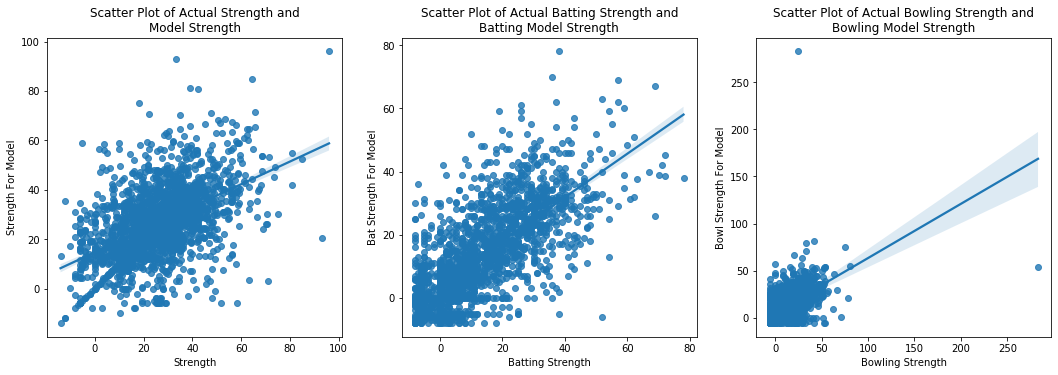

In [26]:
plt.figure(figsize=(18,5.5))
plt.subplot(131)
sns.regplot(x=all_years_player_performance['Strength'], y=all_years_player_performance['Strength For Model'])
plt.title('Scatter Plot of Actual Strength and\nModel Strength')
plt.subplot(132)
sns.regplot(x=all_years_player_performance['Batting Strength'], y=all_years_player_performance['Bat Strength For Model'])
plt.title('Scatter Plot of Actual Batting Strength and\nBatting Model Strength')
plt.subplot(133)
sns.regplot(x=all_years_player_performance['Bowling Strength'], y=all_years_player_performance['Bowl Strength For Model'])
plt.title('Scatter Plot of Actual Bowling Strength and\nBowling Model Strength')

- Actual Strength is the strength of the same season
- Strength is the strength of a season before that we will feed into the model

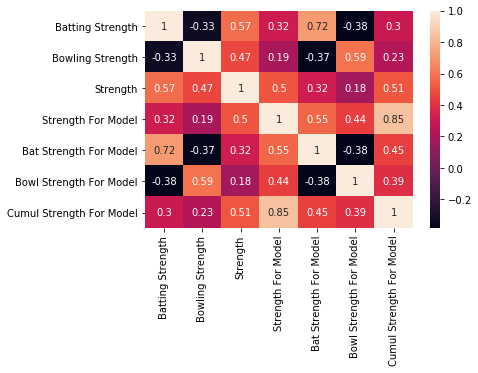

In [27]:
#Pearson Corrleation
ax = sns.heatmap(all_years_player_performance.loc[:,all_years_player_performance.columns[-8:]].corr(), annot=True)

- Here we have the strength of a player according to the formula
- Aggregating the individual strength into the team strength of a team

In [28]:
team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

cum_team_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Cumul Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

team_bat_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: a["Bat Strength For Model"].sort_values(ascending=False)[:11].sum()/max(a["Matches"]))

team_bowl_stren = \
all_years_player_performance.groupby(['Team', 'Year']).apply(lambda a: sum(a["Bowl Strength For Model"].sort_values(ascending=False)[:11])/max(a["Matches"]))

In [29]:
#new = all_years_player_performance.groupby(['Year','Team'])['Player','Strength For Model','Team'].apply(lambda x: x.nlargest(11, columns=['Strength For Model']))

In [30]:
TeamStrength = pd.concat([
                          team_stren,                          
                          team_bat_stren,
                          team_bowl_stren,
                          cum_team_stren], axis=1) 
TeamStrength.columns= [
                       'Team_Strength',                        
                       'Batting_Team_Strength',
                       'Bowling_Team_Strength',
                       'Cumulative_Team_Strength']
TeamStrength.describe()

,Team_Strength,Batting_Team_Strength,Bowling_Team_Strength,Cumulative_Team_Strength
count,100.000000,100.000000,100.000000,100.000000
mean,26.702428,17.165134,16.557766,26.038402
std,3.327214,2.560715,3.742815,3.014527
min,20.436569,11.491228,9.742660,19.937809
25%,24.262769,15.424370,14.306860,23.732599
50%,26.086471,17.060897,15.959770,25.800766
75%,28.765631,18.469538,18.225869,27.672141
max,35.255482,24.428571,39.307236,34.679584


Text(0.5, 1.0, 'Scatter Plot of Team Strength and\nCumulative Team Strength')

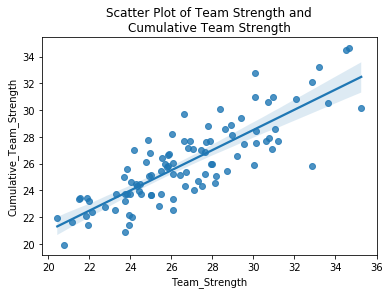

In [31]:
sns.regplot(x=TeamStrength.loc[:,'Team_Strength'], y=TeamStrength.loc[:,'Cumulative_Team_Strength'])
plt.title('Scatter Plot of Team Strength and\nCumulative Team Strength')

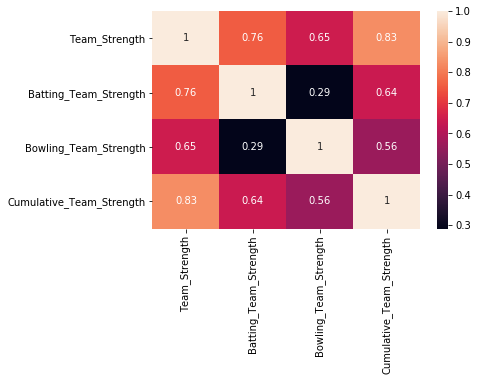

In [32]:
ax = sns.heatmap(TeamStrength.corr(), annot=True)

In [33]:
TeamStrength.head()

Team_Strength  Batting_Team_Strength  Bowling_Team_Strength  \
Team Year                                                                
CSK  2008      22.746533              17.146825              11.497391   
     2009      30.966321              21.192857              18.312296   
     2010      27.781762              17.410714              19.920292   
     2011      24.183259              14.083333              14.535135   
     2012      21.166494              15.984962              12.667610   

           Cumulative_Team_Strength  
Team Year                            
CSK  2008                 22.746533  
     2009                 30.966321  
     2010                 28.814597  
     2011                 27.026374  
     2012                 21.665932

In [34]:
TeamStrength.reset_index(inplace = True)

# Win Ratio Ratio of each team vs another Calculations(AHP)

- Using Analytic Hierarchy Process (AHP) we will find the coefficient(weights) for win rate of each team with respect to the other
- https://www.youtube.com/watch?v=J4T70o8gjlk&t=17s
- The below codes are the standard process(algorithm) for the AHP and can be avoided 

In [35]:
Data = match_data.copy()

We are dropping KTK and GL Teams temporarily because these teams have not played against each other.

In [36]:
# Dropping teams who hasn't played against each other
Data.drop(Data[Data["TEAM1"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "KTK"].index, inplace = True) 
Data.drop(Data[Data["TEAM1"] == "GL"].index, inplace = True) 
Data.drop(Data[Data["TEAM2"] == "GL"].index, inplace = True) 

In [37]:
#Creating Selector variable of form 'TEAMBig v/s TEAMSmall'
Data['Selector'] = ''
Data['Selector'][Data['TEAM1']>Data['TEAM2']] = Data['TEAM1'][Data['TEAM1']>Data['TEAM2']] + " v/s " + Data['TEAM2'][Data['TEAM1']>Data['TEAM2']]
Data['Selector'][Data['TEAM1']<Data['TEAM2']] = Data['TEAM2'][Data['TEAM1']<Data['TEAM2']] + " v/s " + Data['TEAM1'][Data['TEAM1']<Data['TEAM2']]

Data = Data[["Selector", "WINNER"]]

C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\khand\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0

In [39]:
Data = Data[["Selector", "WINNER"]]
Data.head()

,Selector,WINNER
0,RCB v/s KKR,KKR
1,KXIP v/s CSK,CSK
2,RR v/s DD,DD
3,RCB v/s MI,RCB
4,SRH v/s KKR,KKR


In [40]:
#Applying groupby to find winner count
df = pd.DataFrame(Data.groupby('Selector').apply(lambda a: a['WINNER'].value_counts())).reset_index()

#Initializing Win Ratio Column
df['Win Ratio']=0
#df['AHP']=0

df.head()

,Selector,level_1,WINNER,Win Ratio
0,DD v/s CSK,CSK,15,0
1,DD v/s CSK,DD,6,0
2,KKR v/s CSK,CSK,13,0
3,KKR v/s CSK,KKR,7,0
4,KKR v/s DD,KKR,13,0


In [41]:
#Computing Win Ratio using WINNER feature
for i in range(0, 72, 2):
    df["Win Ratio"].iloc[i] = df["WINNER"].iloc[i]/df["WINNER"].iloc[i+1]
    df["Win Ratio"].iloc[i+1] = df["WINNER"].iloc[i+1]/df["WINNER"].iloc[i]

C:\Users\khand\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# AHP Matrix

In [42]:
#Initializing Null Dataframe for pair-wise weight matrix 
Teams = df.level_1.unique()
init_df = pd.DataFrame([], index = Teams, columns = Teams)

#Assigning pair-wise weights using win ratio
for i in range(0,init_df.shape[0]):               #Iteration over rows in init_df
    for j in range(0,init_df.shape[0]):           #Iteration over columns in init_df
        
        if i == j:                                #Enters if element is diagonal
            init_df.iloc[i,j] = 1
    
        elif i != j:                              #Enters if element is non-diagonal
            #Creating Selector variable for given pair
            if init_df.columns[j]>init_df.index[i]: 
                a = init_df.columns[j]+" v/s "+init_df.index[i]
            if init_df.columns[j]<init_df.index[i]:
                a = init_df.index[i]+" v/s "+init_df.columns[j]
            
            #Assigns Win Ratio(column index 3) as pair-wise weight 
            init_df.iloc[i,j] = \
            df[(df['Selector'] == a) & (df['level_1'] == init_df.index[i])].iloc[0,3]

init_df

,CSK,DD,KKR,KXIP,MI,RCB,RPS,RR,SRH
CSK,1,2.5,1.85714,1.33333,0.6875,2.14286,2,2,2.14286
DD,0.4,1,0.769231,0.642857,1,0.571429,1.25,0.727273,1
KKR,0.538462,1.3,1,2.125,0.315789,1.4,3.5,1,1.88889
KXIP,0.75,1.55556,0.470588,1,0.846154,1,1,0.9,0.846154
MI,1.45455,1,3.16667,1.18182,1,1.77778,1.4,1,1.18182
RCB,0.466667,1.75,0.714286,1,0.5625,1,3.5,0.7,0.785714
RPS,0.5,0.8,0.285714,1,0.714286,0.285714,1,0.25,0.666667
RR,0.5,1.375,1,1.11111,1,1.42857,4,1,1.5
SRH,0.466667,1,0.529412,1.18182,0.846154,1.27273,1.5,0.666667,1


- <font color = 'red'> This is the final matrix that we got after the AHP process </font>
- Matrix meaning:
- Eg CSK row:
- DD value is 2.5 it means CSK win rate against DD is 2.5 times more. Bascically CSK has 2.5 times more importance than DD. Similarly 1.85 times more importance than KKR


- This is the verification Code for AHP. It verifies that the ratios are consistent 
- Condition : Consistency Ratio < 0.1

In [43]:
def AHP(df,random_index):
    """Reads Dataframe of numerical pair-wise order columns & random index and
    returns an array of criteria weights if consistency ratio i.e. CR<0.1 is satisfied."""

    matrix=np.mat(df)         #Conveting df to numpy matrix
        
    n=matrix.shape[0]              #Extracting matrix size
    
    if n != matrix.shape[1]:       #Dimension check
        print('Input matrix is not square.\Please verify the matrix dimensions.')
    elif np.multiply(matrix.T,matrix).round(decimals=5).sum()%1 != 0:       #Trnspose elements inverse check
        print('Transpose elements are not reciprocal.\nPlease verify the weights.')
    else:                          #Enters AHP algorithm
        #Pair-wise weight matrix divided column sums
        mat1 = np.divide(matrix, matrix.sum(axis=0))
        
        #Criteria weights computed by Row-wise mean of mat1
        criteria_weights = mat1.mean(axis=1)
        
        #Weighted sum computed by element wise multiplication of pair-wise matrix with criteria weight followed by
        #row-wise addition
        weighted_sum = np.multiply(matrix, criteria_weights.T).sum(axis=1)
        
        #lamda computed by averaging of ratio of weighted sum and criteria weights
        lambda_max = (weighted_sum/criteria_weights).mean()
    
        #CI & CR Calculation
        consistency_index = (lambda_max-n)/(n-1)
        consistency_ratio = consistency_index/random_index

        if consistency_ratio<0.1:
            print(f'Consistency Ratio {consistency_ratio:.4} satisfies CR < 0.1 condition')
            return criteria_weights
        else:
            print(f'Consistency Ratio {consistency_ratio:.4} does not satisfy CR < 0.1 condition')
            return None

In [44]:
weights = AHP(init_df.astype('float'), 1.45)

Consistency Ratio 0.04966 satisfies CR < 0.1 condition


## <font color = 'red'>Final Coefficients that we recieved after the AHP Process</red>

In [45]:
Team_criteria_weights= pd.DataFrame(weights, index = init_df.index).sort_values(by=0)
Team_weights = Team_criteria_weights/Team_criteria_weights.mean()
Team_weights

,0
RPS,0.542951
DD,0.726843
SRH,0.812388
KXIP,0.844212
RCB,0.898418
RR,1.142555
KKR,1.147092
MI,1.364477
CSK,1.521064


In [46]:
Team_priority_using_AHP = TeamStrength.iloc[:,[0,1]]
Team_priority_using_AHP.head()

,Team,Year
0,CSK,2008
1,CSK,2009
2,CSK,2010
3,CSK,2011
4,CSK,2012


In [ ]:
def ahp_bat_strength(df):
    """
    Calculates Player Batting Strength using the formula calculated using AHP.
    """
    
    df["AHP_bat"] = 0.388726074*df["Batting Average"] + 0.260099468*df["Batting Innings"]\
                  + 0.175428513*df["Batting SR"] + 0.083438652*df["50's"]\
                  + 0.055018035*df["100's"] + 0.037289258*df["0's"]
    

def ahp_bowl_strength(df):
    """
    Calculates Player Bowling Strength using the formula calculated using AHP.
    """
    
    df["AHP_bowl"] = 0.387508576*df["Overs"] + 0.281308382*df["Bowling Economy"]\
                  + 0.158764794*df["Wickets"] + 0.073609038*df["Bowling Average"]\
                  + 0.067861912*df["Bowling SR"] + 0.030947298*df["4W Haul"]
    
ahp_bat_strength(Team_priority_using_AHP)
ahp_bowl_strength(Team_priority_using_AHP)

In [ ]:
Team_priority_using_AHP["AHP_bat"].min(), Team_priority_using_AHP["AHP_bat"].max()

In [ ]:
Team_priority_using_AHP.min(), Team_priority_using_AHP["AHP_bowl"].max()

## We need to scale the values the AHP columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Team_priority_using_AHP.iloc[:, 3:] = scaler.fit_transform(Team_priority_using_AHP.iloc[:, 3:])

In [ ]:
Team_priority_using_AHP["AHP_bat"].min(), Team_priority_using_AHP["AHP_bat"].max()

In [ ]:
Team_priority_using_AHP.min(), Team_priority_using_AHP["AHP_bowl"].max()

In [ ]:
Team_priority_using_AHP["AHP_bat+bowl"] = Team_priority_using_AHP["AHP_bat"] + Team_priority_using_AHP["AHP_bowl"]
Team_priority_using_AHP

## We have given rankings to the AHP weights highest will be 1 

In [ ]:
for team in Team_weights.index:
    
    i = Team_priority_using_AHP[Team_priority_using_AHP['Team']==team].index
    Team_priority_using_AHP.loc[i,'AHP'] = Team_weights.loc[team,0]

In [ ]:
Team_priority_using_AHP=Team_priority_using_AHP.fillna(1)

In [ ]:
Team_priority_using_AHP = Team_priority_using_AHP.round(5)

In [ ]:
Team_priority_using_AHP['AHP'].unique()

In [ ]:
dictw={1.69305:1, 0.80903:8, 1.:5, 1.27679:3, 0.93966:6,
       1.51875:2, 0.60434:9, 1.27174:4 , 0.90424:7 }

- Addidng the AHP values that we got into the main model

In [ ]:
Team_priority_using_AHP = Team_priority_using_AHP.replace(dictw)

# Merge 

### This section is for merging the 2 dataframes 

- Match Data : Data containing all the match features
- Strength Data : Features that we built 
- Feature Data Format: ['Team', 'Year', 'Feature_1', 'Feature_2', ....] 

In [ ]:
# Team_Points = pd.read_csv('team_points.csv')
# Team_Points.head()
    

match_data
TeamStrength
Team_priority_using_AHP

In [ ]:
def feature_joiner(df1,df2):
    """Reads Dataframe containing match data (df1) & Dataframe containing Team Features (df2) and 
    returns df1 with additional features joined from df2
    
    df2 should be in this format:
    df2.columns = ['Team', 'Year', 'Feature_1', 'Feature_2', ....] """
    
    new_columns = list('TEAM1_'+df2.columns[2:])+list('TEAM2_'+df2.columns[2:])   #Extracting names of new columns
    n_features = int(len(new_columns)/2)                                          #Number of new features for a given team    
    
    df1 = pd.concat([df1, pd.DataFrame(columns = new_columns)],sort=False)        #Adding new columns to the original dataframe
    
    for team in df2.iloc[:,0].unique():   #Iteration over teams
        for year in df2[df2.iloc[:,0] == team].iloc[:,1].unique():    #Iteration over seasons
            #Reading index of rows with team in TEAM1 column
            i = df1[(df1.loc[:,'TEAM1'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[i, -n_features*2:-n_features] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
            
            #Reading index of rows with team in TEAM2 column
            j = df1[(df1.loc[:,'TEAM2'] == team) & (df1.loc[:,'SEASON'] == year)].index
            #Assigning values
            df1.iloc[j, -n_features:] = df2[(df2.iloc[:,0] == team) & (df2.iloc[:,1] == year)].iloc[:,2:].values
        
    return df1

In [ ]:
Data = feature_joiner(match_data, TeamStrength)
Data.head().T

In [ ]:
Data['TEAM1'].value_counts()

# AHP Strength

In [ ]:
AhpStrength = pd.read_csv('ahp_final.csv')
AhpStrength.head()

In [ ]:
AhpStrength = AhpStrength.replace('PWI','RPS')

In [ ]:
AhpStrength = AhpStrength.replace('PWI','RPS')
AhpStrength.loc[((AhpStrength['Year'] < 2016) & (AhpStrength['Team'] == 'DC')),'Team']='SRH'
AhpStrength.loc[((AhpStrength['Year'] > 2016) & (AhpStrength['Team'] == 'DC')),'Team']='DD'
Team_Ahp = AhpStrength.groupby(['Year', 'Team'])['AHP_bat','AHP_bowl','AHP_bat+bowl'].mean().reset_index()

In [ ]:
AhpStrength.loc[((AhpStrength['Year'] > 2016) & (AhpStrength['Team'] == 'DC')),'Team']='DD'

In [ ]:
#Team_Ahp.to_csv('Final_Team_Ahp_Strength.csv')

In [ ]:
Team_Ahp = AhpStrength.groupby(['Year', 'Team'])['AHP_bat','AHP_bowl','AHP_bat+bowl'].mean().reset_index()
Team_Ahp.head()

In [ ]:
New_Data = feature_joiner(match_data, AhpStrength)
New_Data.head().T

In [ ]:
Data['TEAM1_WINxSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team_Strength']
Data['TEAM1_WINxCUMSTREN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Cumulative_Team_Strength']


#Data['TEAM1_WINxAHPMEAN'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP mean']
#Data['TEAM1_WINxAHPVAL'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP value']
#Data['TEAM1_WINxAHPMED'] = Data['TEAM1_WIN_RATE']*Data['TEAM1_Team AHP median']

Data['TEAM2_WINxSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team_Strength']
Data['TEAM2_WINxCUMSTREN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Cumulative_Team_Strength']
#Data['TEAM2_WINxAHPVAL'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP value']
#Data['TEAM2_WINxAHPMEAN'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP mean']
#Data['TEAM2_WINxAHPMED'] = Data['TEAM2_WIN_RATE']*Data['TEAM2_Team AHP median']

In [ ]:
Data['TEAM1_CONSISTENCY'] = ((Data['TEAM1_Team_Strength'] * 0.8) + (Data['TEAM1_Cumulative_Team_Strength'] * 0.2)) / 2
Data['TEAM2_CONSISTENCY'] = ((Data['TEAM2_Team_Strength'] * 0.8) + (Data['TEAM2_Cumulative_Team_Strength'] * 0.2)) / 2

In [ ]:
Data.columns

In [ ]:
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM1_CUMUSTR_TOSS'] = 1 *Data['TEAM1_Cumulative_Team_Strength'] * 0.61
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM2_CUMUSTR_TOSS'] = 0 *Data['TEAM2_Cumulative_Team_Strength'] * 0.39

Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM1_CUMUSTR_TOSS'] = 0 * Data['TEAM1_Cumulative_Team_Strength'] * 0.39
Data.loc[(Data['TOSS_WINNER_MODEL'] == 1) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM2_CUMUSTR_TOSS'] = 1 * Data['TEAM2_Cumulative_Team_Strength'] * 0.61


Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM2_CUMUSTR_TOSS'] = 1 * Data['TEAM2_Cumulative_Team_Strength'] * 0.61
Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 1),'TEAM1_CUMUSTR_TOSS'] = 0 * Data['TEAM1_Cumulative_Team_Strength'] * 0.39

Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM2_CUMUSTR_TOSS'] = 0 * Data['TEAM2_Cumulative_Team_Strength'] * 0.39
Data.loc[(Data['TOSS_WINNER_MODEL'] == 0) & (Data['TOSS_DECISION_MODEL'] == 0),'TEAM1_CUMUSTR_TOSS'] = 1 * Data['TEAM1_Cumulative_Team_Strength'] * 0.61


if team1 win toss 
    if team1 chooses field:
        team1str = team1str * 0.61
        team2str = team2str * 0.39
    else:
        team1str = team1str * 0.39
        team2str = team2str * 0.61
else team2 win toss
    if team2 chooses field:
        team2str = team1str * 0.61
        team1str = team2str * 0.39
    else:
        team2str = team1str * 0.39
        team1str = team2str * 0.61

In [ ]:
Diff_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','DIFF_').drop('DIFF_MODEL')
Diff_Features

In [ ]:
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))]=\
Data[list('TEAM1_'+Diff_Features.str.replace('DIFF_',''))+list('TEAM2_'+Diff_Features.str.replace('DIFF_',''))].astype('float64',copy=True)

In [ ]:
for f in Diff_Features:
    Data[f] = Data['TEAM1_'+f.replace('DIFF_','')]-Data['TEAM2_'+f.replace('DIFF_','')]


In [ ]:
Ratio_Features = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','RATIO_').drop('RATIO_MODEL')
Ratio_Features

In [ ]:
Data.head()

In [ ]:
Data.dropna(inplace = True)

In [ ]:
Data.isnull().sum()

In [ ]:
X = Data.drop(['ID','CITY',
             'CITY_Corrrected', 
             'TEAM1', 'TEAM2', 
             'TEAM1_MODEL', 'TEAM2_MODEL', 
             'TOSS_WINNER', 'TOSS_DECISION', 'RESULT', 
             'WINNER','WINNER_MODEL',
             'WIN_BY_RUNS'],axis=1)

In [ ]:
y = Data['WINNER_MODEL'] 

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def symmetric_splitting(X,Y,split_size,random):
    
    #Splitting the Data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split_size, random_state=random)
    
    #Training Set mirrored and merged
    Xsyn_train=pd.DataFrame([],columns=X_train.columns)

    Xsyn_train['SEASON'] = X_train['SEASON']
    Xsyn_train['TOSS_DECISION_MODEL'] = (X_train['TOSS_DECISION_MODEL']==1)*0+(X_train['TOSS_DECISION_MODEL']==0)*1
    Xsyn_train['TOSS_WINNER_MODEL'] = (X_train['TOSS_WINNER_MODEL']==1)*0+(X_train['TOSS_WINNER_MODEL']==0)*1
    Xsyn_train['CITY_MODEL'] =(X_train['CITY_MODEL']==1)*0+(X_train['CITY_MODEL']==0)*1+(X_train['CITY_MODEL']==2)*2
    
    Flip = Data.columns[Data.columns.str.contains('TEAM1_')].str.replace('TEAM1_','').drop('MODEL')
    Xsyn_train['TEAM1_'+Flip] = X_train['TEAM2_'+Flip]
    Xsyn_train['TEAM2_'+Flip] = X_train['TEAM1_'+Flip]
    
    Xsyn_train[Diff_Features]=-X_train[Diff_Features]
    
    ysyn_train = (y_train==1)*0+(y_train==0)*1
    
    Xsymm_train = X_train.append(Xsyn_train,ignore_index=True)
    ysymm_train = y_train.append(ysyn_train,ignore_index=True)
    
    #Test Set mirrored
    Xsyn_test=pd.DataFrame([],columns=X_train.columns)

    Xsyn_test['SEASON'] = X_test['SEASON']
    Xsyn_test['TOSS_DECISION_MODEL'] = (X_test['TOSS_DECISION_MODEL']==1)*0+(X_test['TOSS_DECISION_MODEL']==0)*1
    Xsyn_test['TOSS_WINNER_MODEL'] = (X_test['TOSS_WINNER_MODEL']==1)*0+(X_test['TOSS_WINNER_MODEL']==0)*1
    Xsyn_test['CITY_MODEL'] =(X_test['CITY_MODEL']==1)*0+(X_test['CITY_MODEL']==0)*1+(X_test['CITY_MODEL']==2)*2
    
    Xsyn_test['TEAM1_'+Flip] = X_test['TEAM2_'+Flip]
    Xsyn_test['TEAM2_'+Flip] = X_test['TEAM1_'+Flip]
    
    Xsyn_test[Diff_Features]=-X_test[Diff_Features]
    
    ysyn_test = (y_test==1)*0+(y_test==0)*1
    
    return Xsymm_train, ysymm_train, X_test, y_test, Xsyn_test, ysyn_test

In [ ]:
X_train, y_train, X_test1, y_test1, X_test2, y_test2 = symmetric_splitting(X,y,0.2,101)

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train.head().T

# Model To Train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE

In [ ]:
def print_score(model,X_t,y_t,X_v1,y_v1,X_v2,y_v2):
    
    ambiguity = sum(model.predict(X_test1)==model.predict(X_test2))/len(model.predict(X_test1))
    ambi_rows = X_test1[model.predict(X_test1)==model.predict(X_test2)]
    
    real_test_score = model.score(X_test1.drop(ambi_rows.index),y_test1.drop(ambi_rows.index))\
    *len(y_test1.drop(ambi_rows.index))/len(y_test1)
        
    print(f"""Training Accuracy of the model:      {model.score(X_t,y_t):.3%}
Test 1 Accuracy of the model:        {model.score(X_v1,y_v1):.3%}
Test 2 Accuracy of the model:        {model.score(X_v2,y_v2):.3%}
True Test Accuracy of the model:     {real_test_score:.3%}
Ambiguity of the model:              {ambiguity:.3%}""")

In [ ]:
mod = RandomForestClassifier(n_estimators=1000,
                             max_depth=5,
                             #min_samples_leaf=5,
                             n_jobs=-1,random_state=1)
#                             oob_score=True)
#mod.fit(X_train, y_train)

In [ ]:
selector = RFE(mod, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)
X_train.columns[selector.support_]

In [ ]:
print_score(selector,X_train, y_train, X_test1, y_test1, X_test2, y_test2)